In [3]:
%run ../common_utils.py

In [4]:
def load_data(val_data=False,path=None,cat_unknown=False):
    train, test, metadata = load_all_data(path=path)
    nonCategorical, categorical = get_cat_and_non_cat_data(metadata)
    all_features = list(train.columns)
    all_features.remove('price')
    numerical_features = ['area_total','area_kitchen','area_living','floor','rooms','ceiling',
        'bathrooms_shared','bathrooms_private','balconies','loggias','phones','building_id','constructed','stories']
    categorical_to_numerical(train, ['street','address'])
    categorical_to_numerical(test, ['street','address'])
    if not val_data:
        X_train, y_train, test_labels = pre_process_numerical(features = all_features, numerical_features = numerical_features, train = train, test = test,
                            outliers_value=7, val_data=val_data, val_split=0.2, random_state=42, scaler="std",
                            add_R="True", add_rel_height="True", droptable=[],
                            one_hot_encode=False, cat_features=categorical, drop_old=True,categorical_unknown=cat_unknown)
        y_train_log = np.log(y_train)
        return X_train, y_train, y_train_log, test_labels
    else:
        X_train, y_train, X_test, y_test, test_labels = pre_process_numerical(features = all_features, numerical_features = numerical_features, train = train, test = test,
                            outliers_value=7, val_data=val_data, val_split=0.2, random_state=42, scaler="std",
                            add_R="True", add_rel_height="True", droptable=[],
                            one_hot_encode=False, cat_features=categorical, drop_old=True,categorical_unkown=cat_unknown)
        y_train_log = np.log(y_train)
        return X_train, y_train, y_train_log, X_test, y_test, test_labels

In [5]:
train, test, metadata = load_all_data()

In [6]:
nonCategorical, categorical = get_cat_and_non_cat_data(metadata)

In [7]:
x = train.drop(['price'],axis=1)
y = train['price']
test = test

train_true = [1]*len(x.index)
train_false = [0]*len(test.index)

x['train'] = train_true
test['train'] = train_false

In [8]:
concatenated = pd.concat([x, test], sort=False)
concatenated.drop(['street','address'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


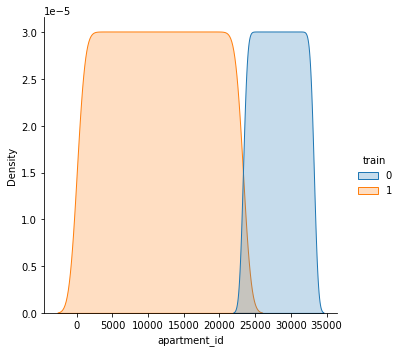

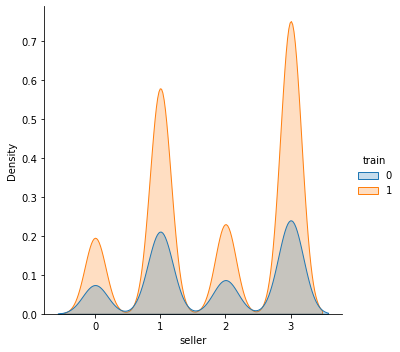

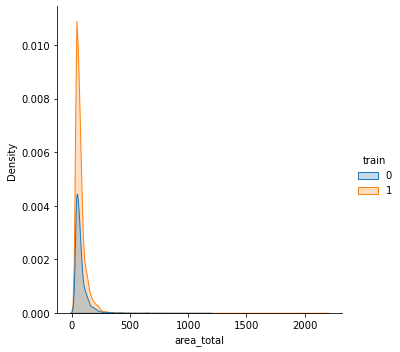

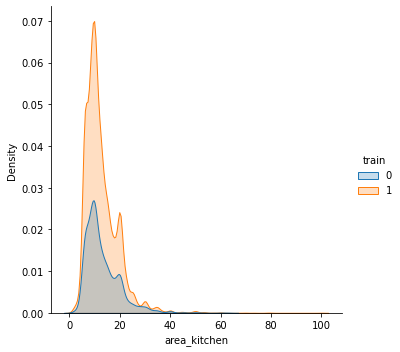

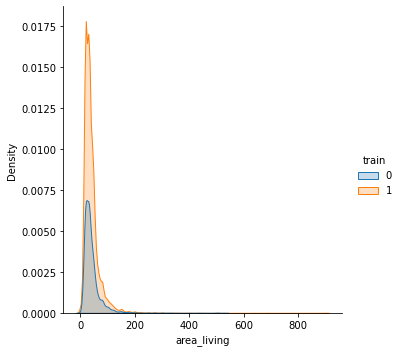

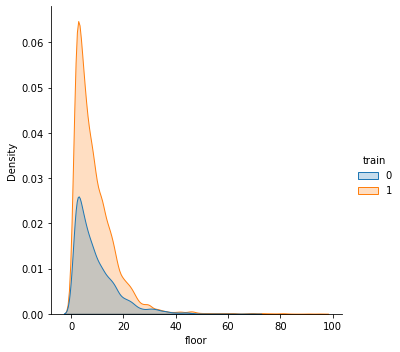

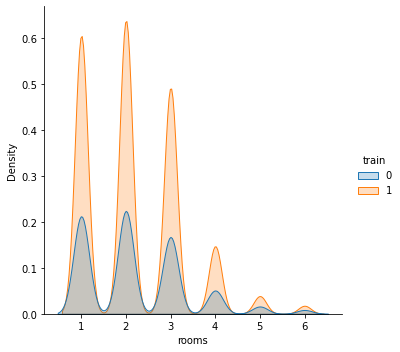

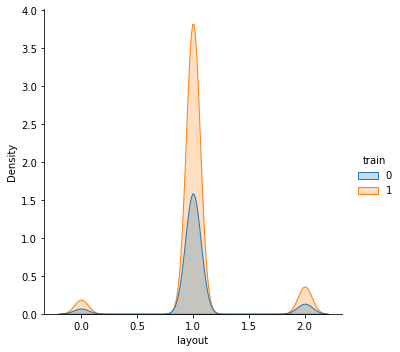

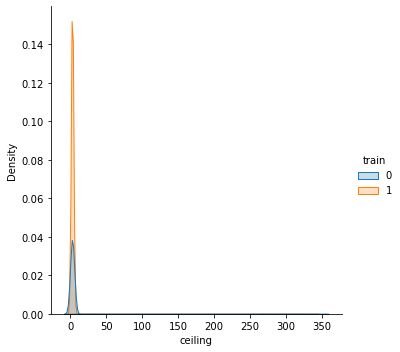

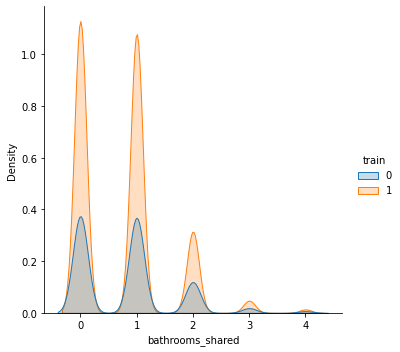

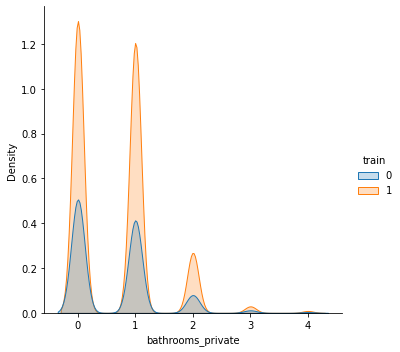

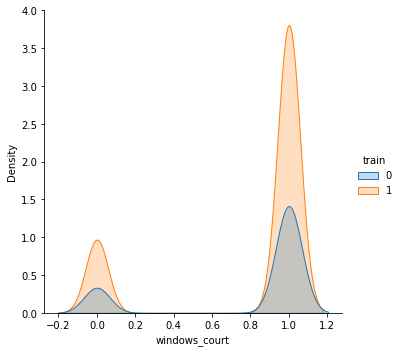

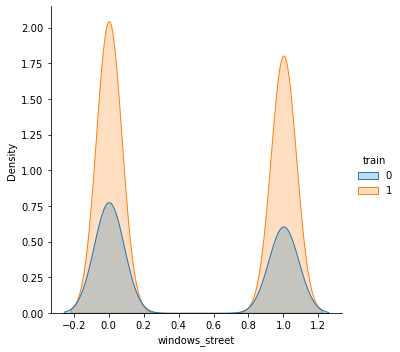

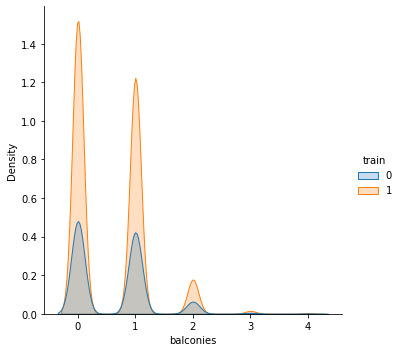

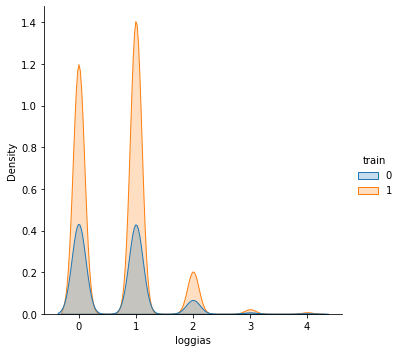

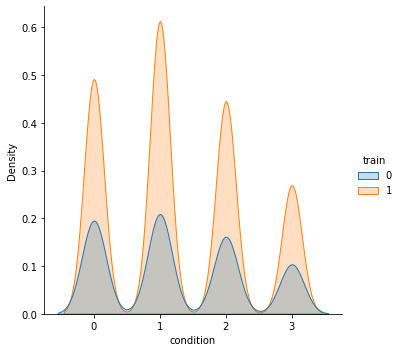

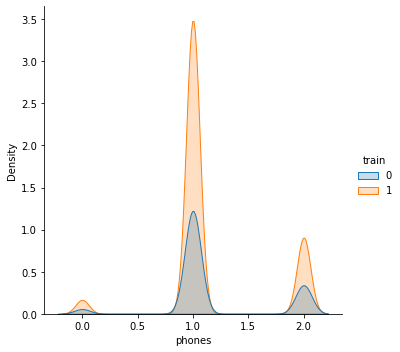

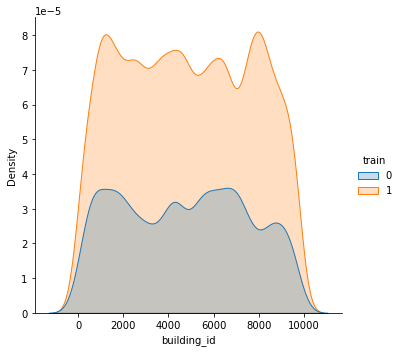

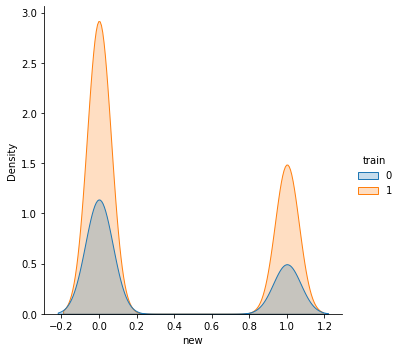

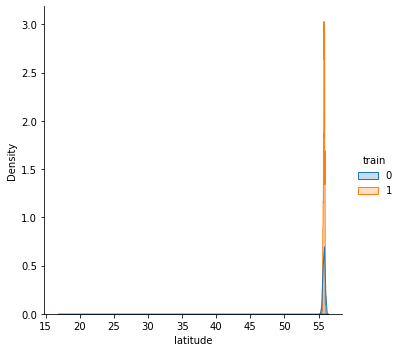

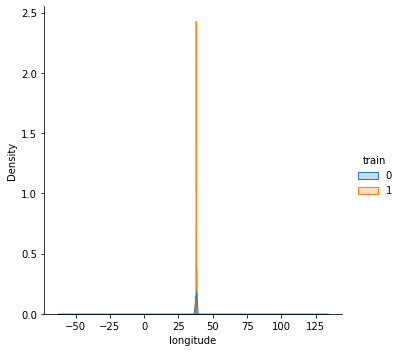

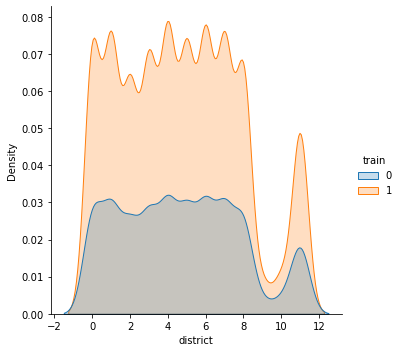

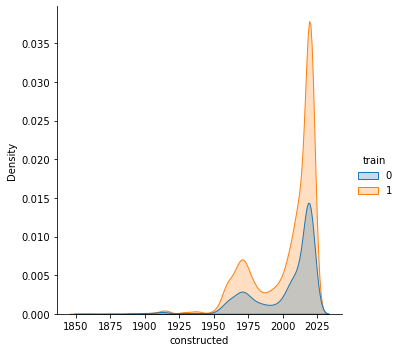

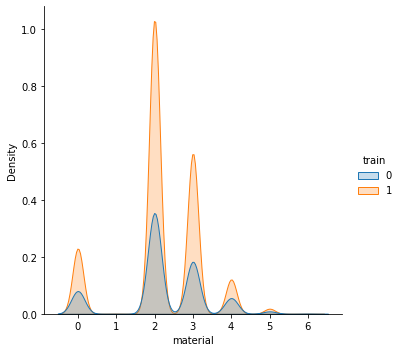

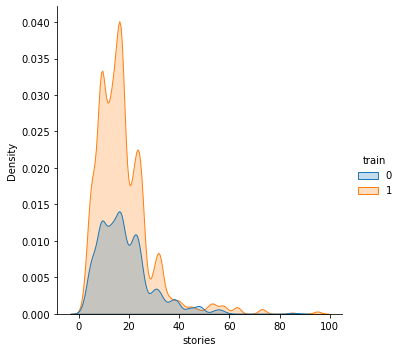

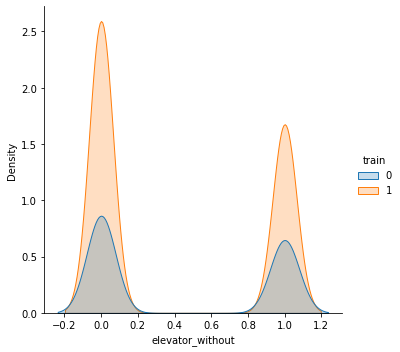

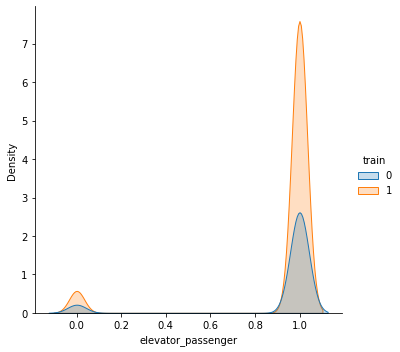

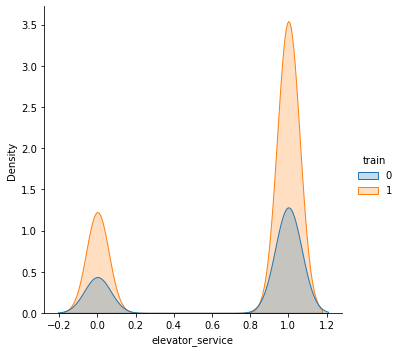

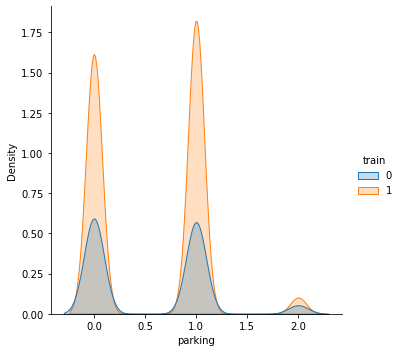

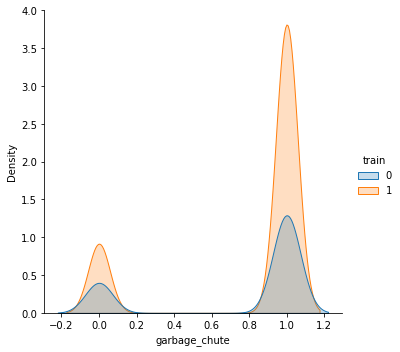

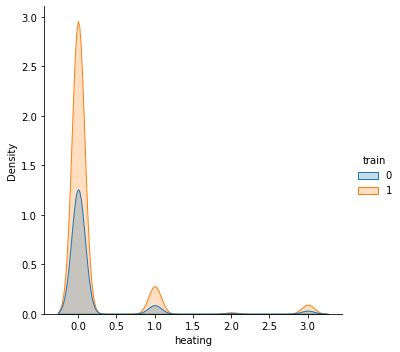

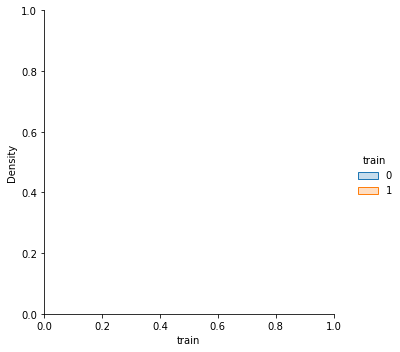

In [72]:
for column in concatenated.columns:
    sns.displot(concatenated, x=(concatenated[column]), hue="train", kind="kde", fill=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


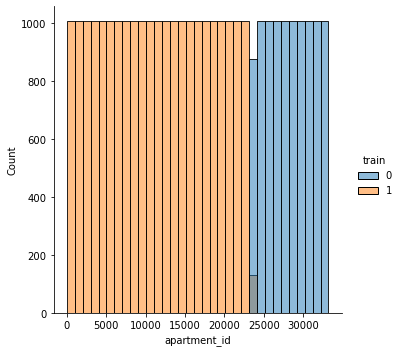

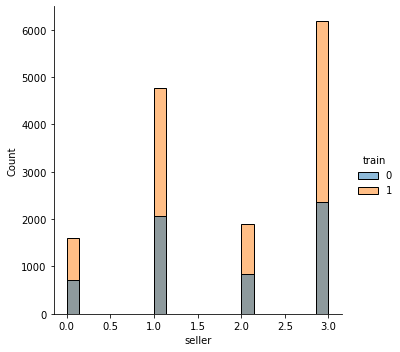

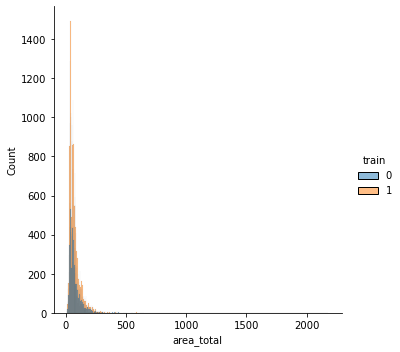

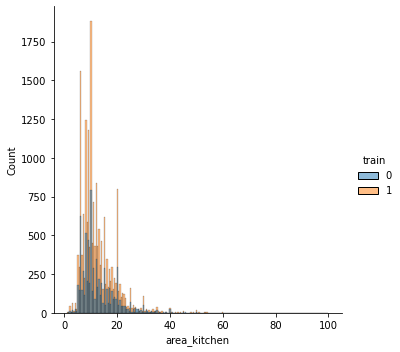

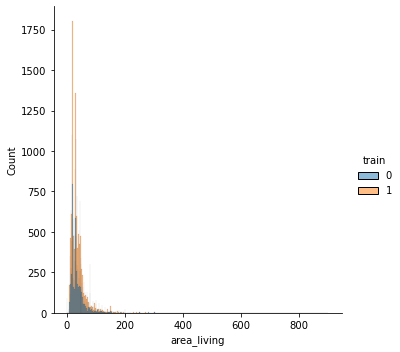

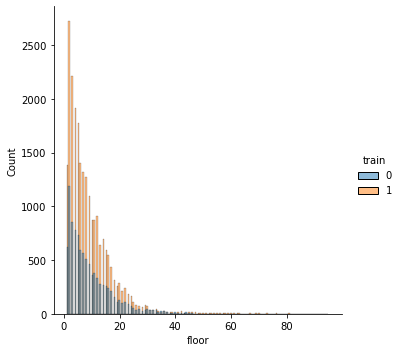

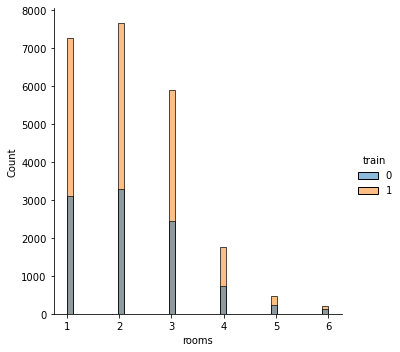

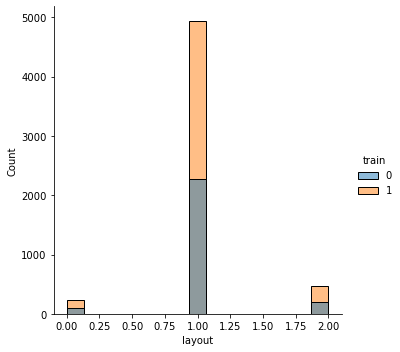

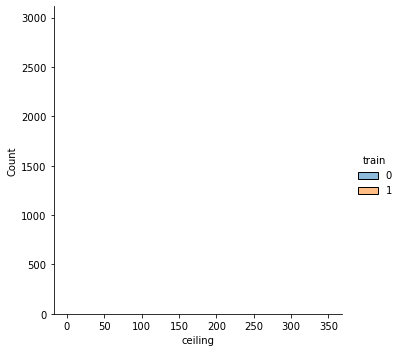

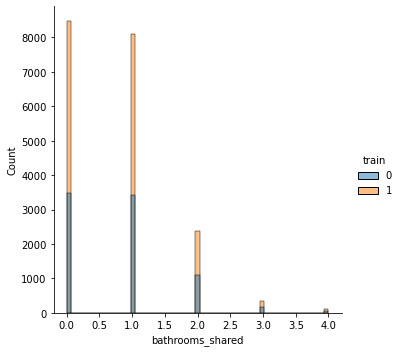

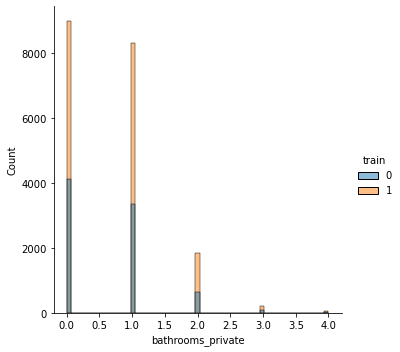

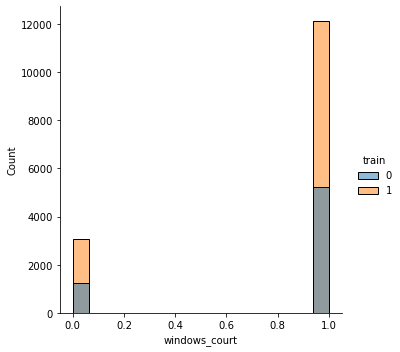

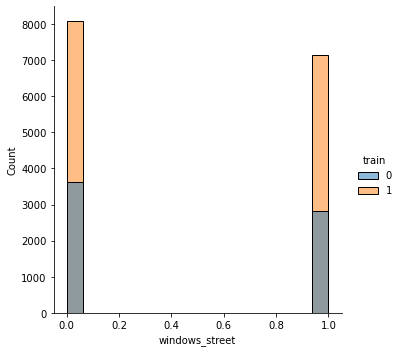

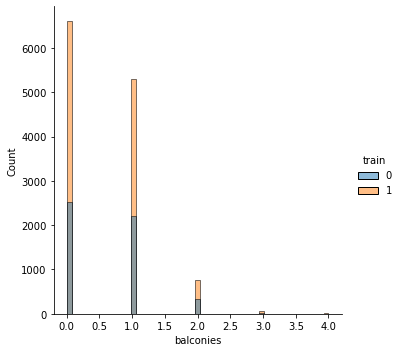

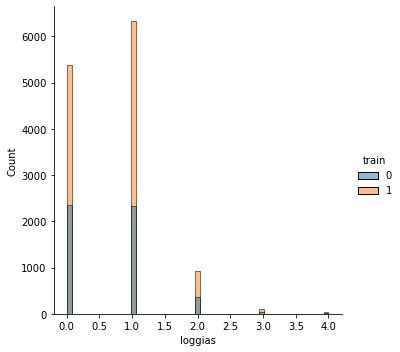

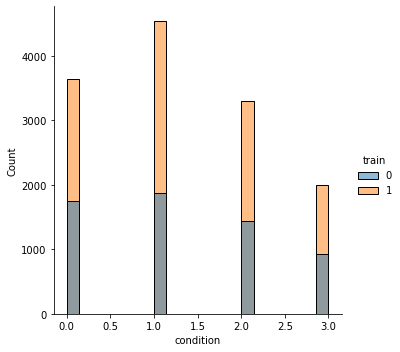

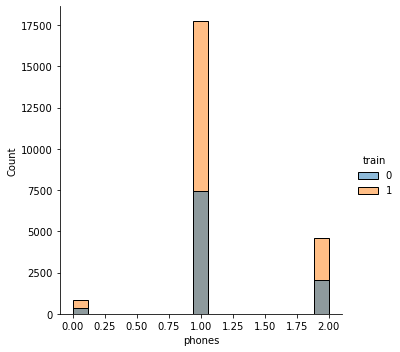

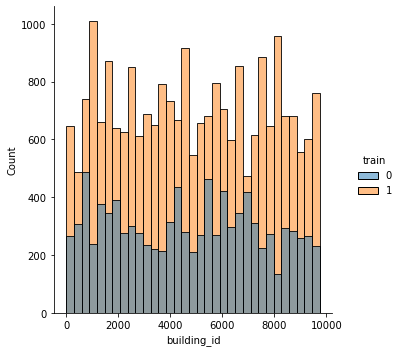

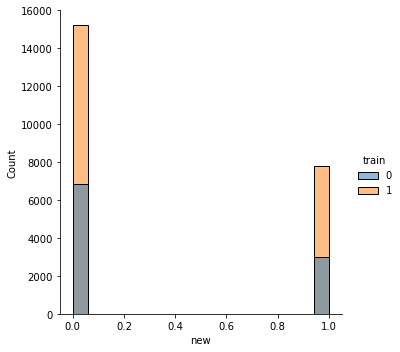

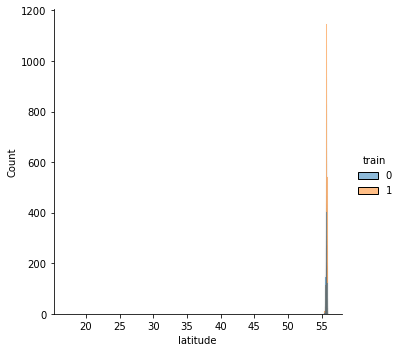

Error in callback <function flush_figures at 0x000001C691E4D700> (for post_execute):


KeyboardInterrupt: 

In [110]:
for column in concatenated.columns:
    sns.displot(concatenated, x=(concatenated[column]), hue="train", fill=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


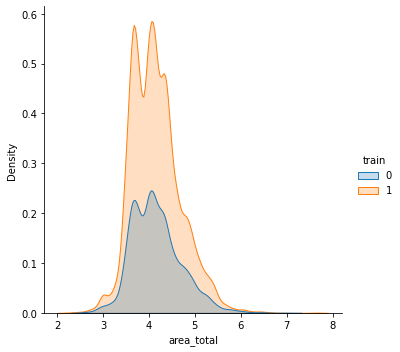

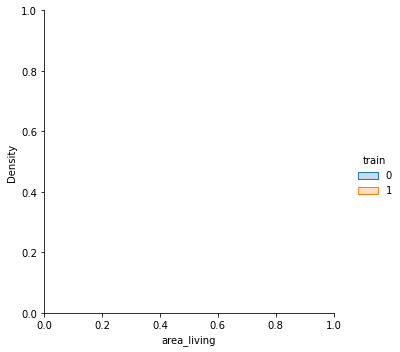

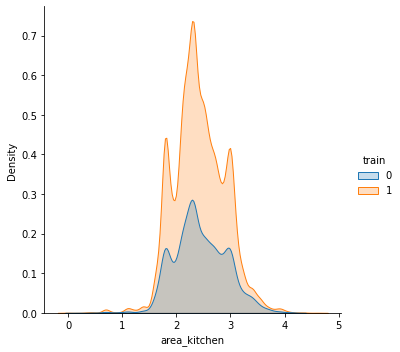

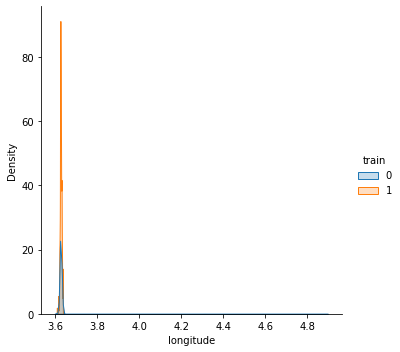

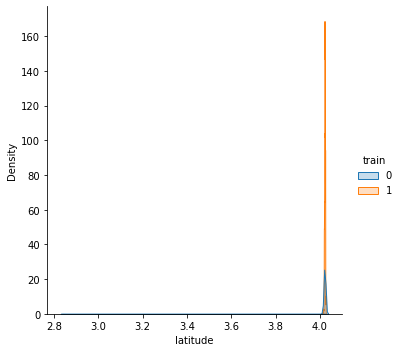

In [75]:
for column in ['area_total','area_living','area_kitchen','longitude','latitude']:
    sns.displot(concatenated, x=np.log(concatenated[column]), hue="train", kind="kde", fill=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


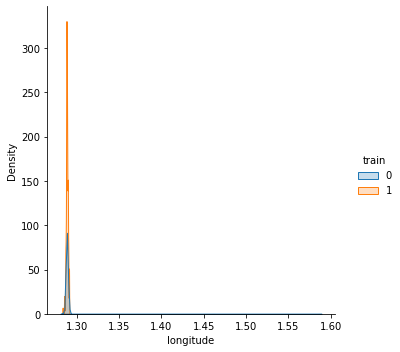

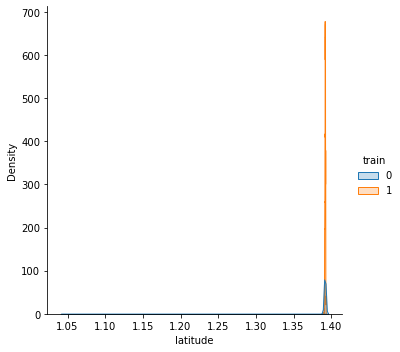

In [76]:
for column in ['longitude','latitude']:
    sns.displot(concatenated, x=np.log(np.log(concatenated[column])), hue="train", kind="kde", fill=True)

Obvious that longitude and latitude have crazy outliers

In [78]:
print(np.max(test['area_living']))
print(np.min(test['area_living']))
print(np.max(train['area_living']))
print(np.min(train['area_living']))

528.0
0.0
900.0
0.0


In [85]:
print("0 area_living in test data:", (test['area_living'] == 0).sum())
print("0 area_living in train data:", (train['area_living'] == 0).sum())

0 area_living in test data: 6
0 area_living in train data: 94


In [86]:
print("0 area_kitchen in test data:", (test['area_kitchen'] == 0).sum())
print("0 area_kitchen in train data:", (train['area_kitchen'] == 0).sum())

0 area_kitchen in test data: 0
0 area_kitchen in train data: 0


In [87]:
print("0 area_total in test data:", (test['area_total'] == 0).sum())
print("0 area_total in train data:", (train['area_total'] == 0).sum())

0 area_total in test data: 0
0 area_total in train data: 0


In [100]:
def intersection(lst1, lst2):
 
    # Use of hybrid method
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return set(lst3)

In [90]:
test_building_id=list(test['building_id'])
train_building_id=list(train['building_id'])

In [104]:
for column in concatenated.drop(['train'],axis=1).columns:
    print()
    print(column)
    n_intersections = len(intersection(list(test[column]),list(train[column])))
    print("number of intersections: ", n_intersections)
    if n_intersections == 0:
        print ("!!!!!!!!!!!!!!!!")
    print("columns in test:         ", len((list(test[column]))))
    print("columns in train:        ", len((list(train[column]))))
    print("unique values in test:   ", len(((test[column].unique()))))
    print("unique values in train:  ", len(((train[column].unique()))))


apartment_id
number of intersections:  0
!!!!!!!!!!!!!!!!
columns in test:          9937
columns in train:         23285
unique values in test:    9937
unique values in train:   23285

seller
number of intersections:  4
columns in test:          9937
columns in train:         23285
unique values in test:    5
unique values in train:   5

area_total
number of intersections:  1289
columns in test:          9937
columns in train:         23285
unique values in test:    1880
unique values in train:   3249

area_kitchen
number of intersections:  292
columns in test:          9937
columns in train:         23285
unique values in test:    334
unique values in train:   386

area_living
number of intersections:  709
columns in test:          9937
columns in train:         23285
unique values in test:    811
unique values in train:   1042

floor
number of intersections:  53
columns in test:          9937
columns in train:         23285
unique values in test:    53
unique values in train:   84



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


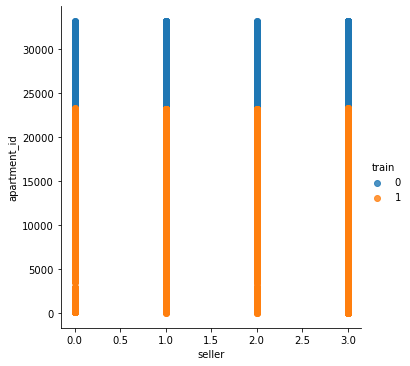

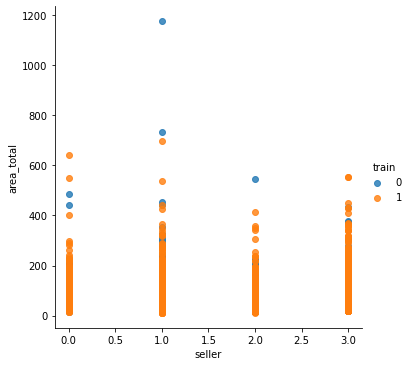

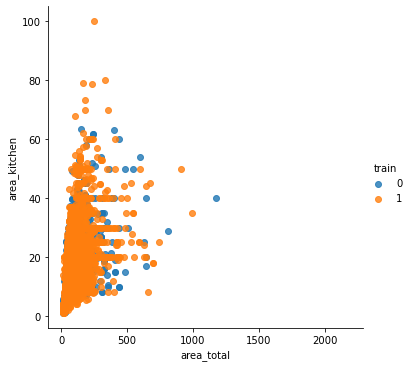

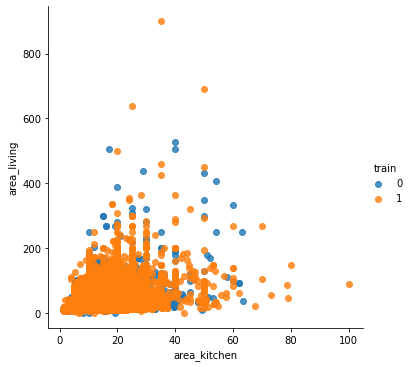

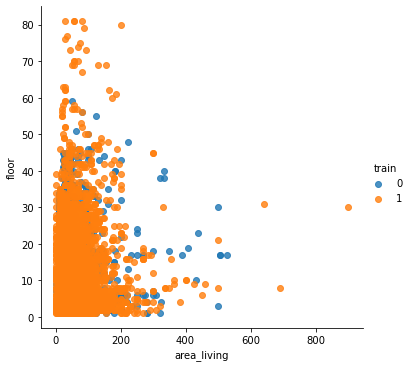

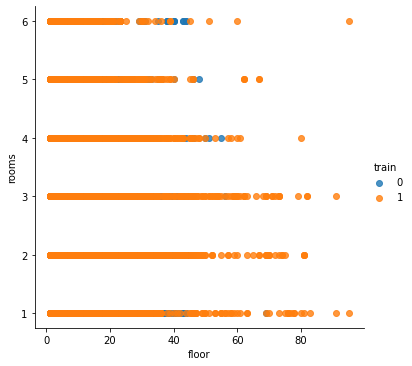

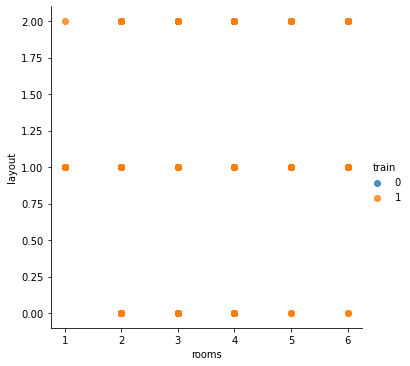

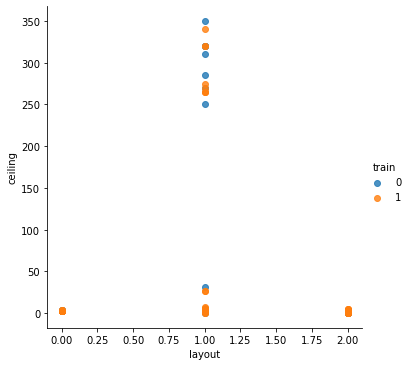

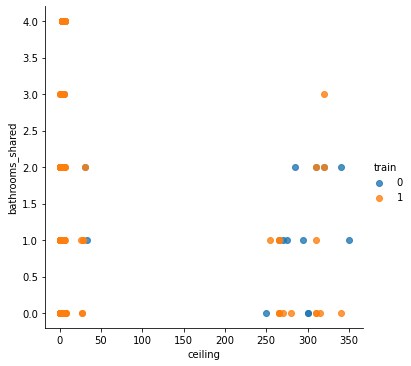

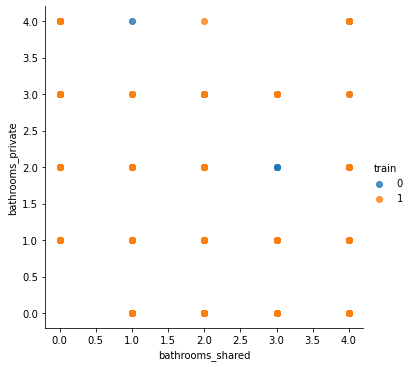

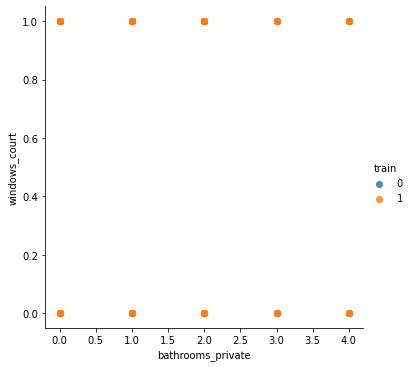

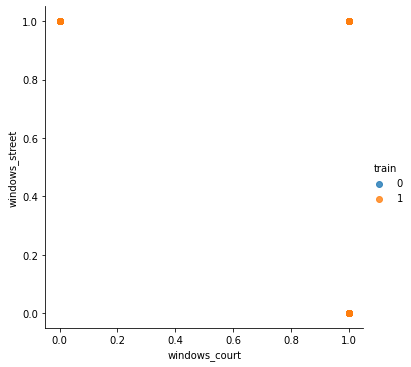

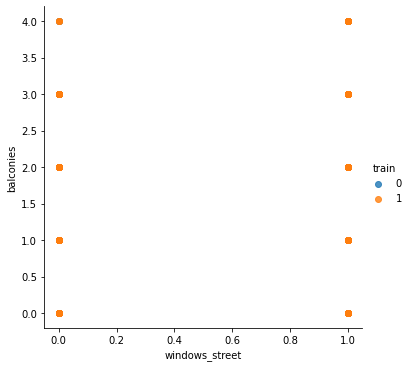

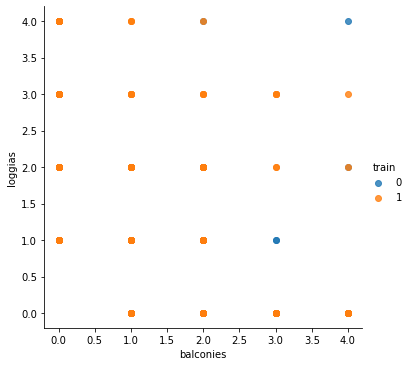

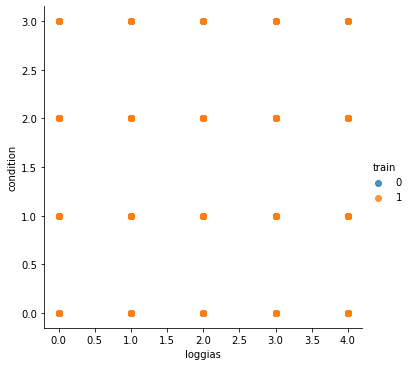

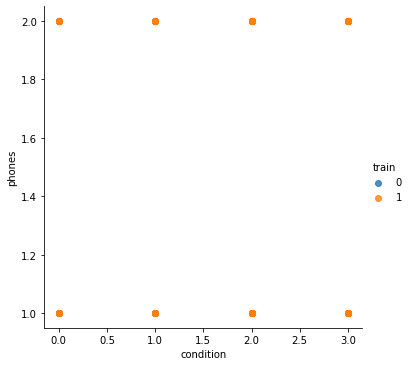

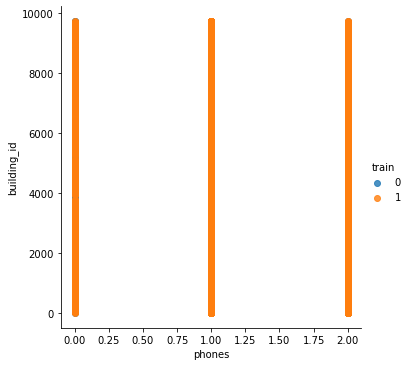

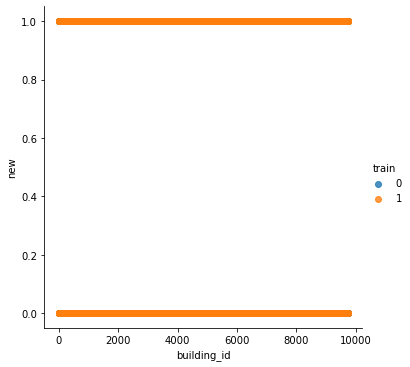

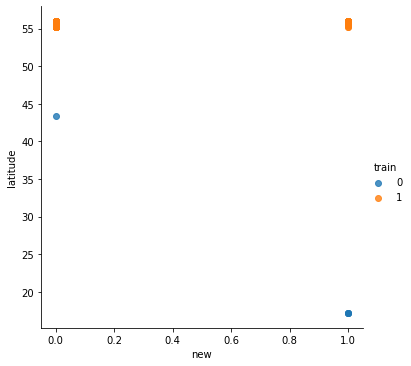

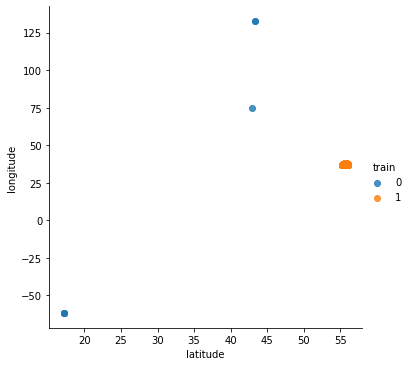

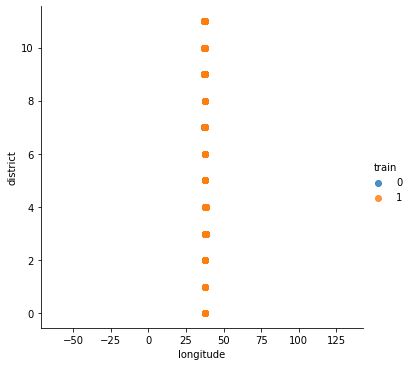

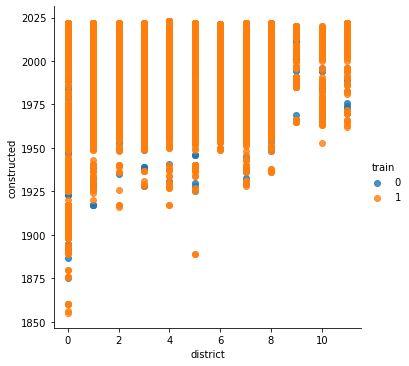

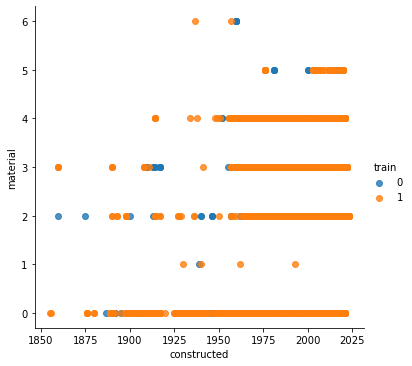

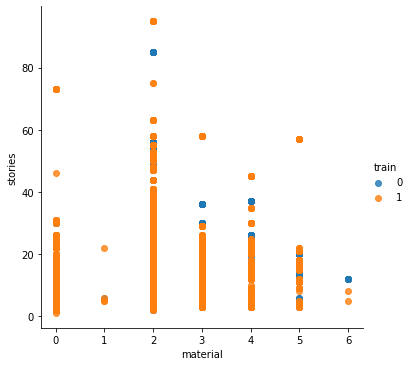

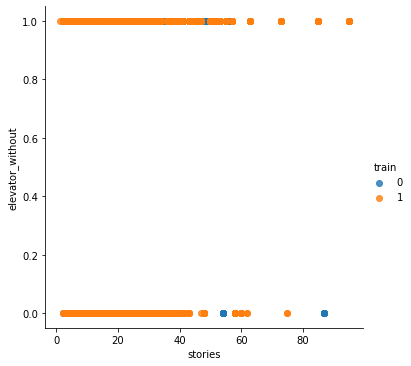

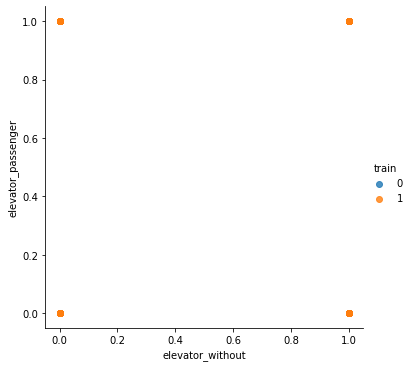

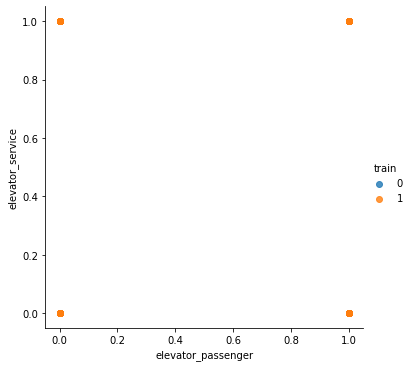

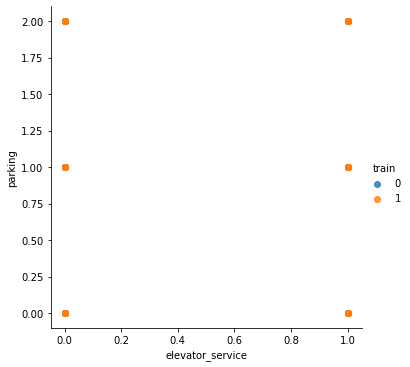

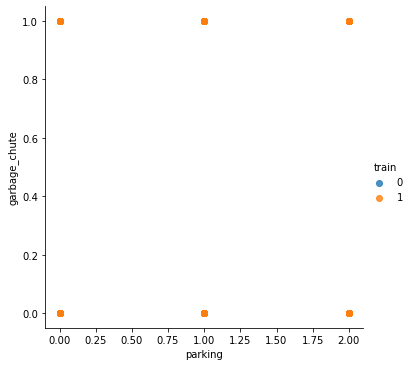

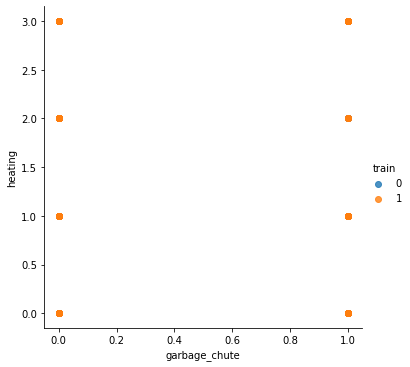

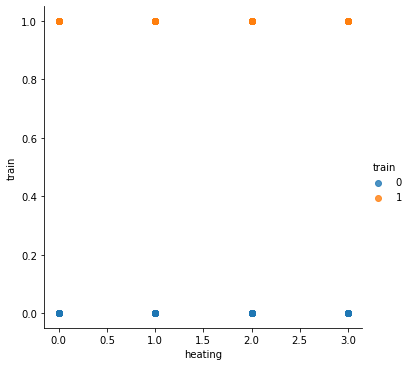

In [109]:
previous_col = 'seller'
for next_col in concatenated.columns:
    if next_col != 'seller':
        sns.lmplot(x=previous_col, y=next_col, hue='train', data=concatenated, fit_reg=False)
    previous_col = next_col

In [26]:
concatenated_log=concatenated

remove_zero = [row["area_living"] if row["area_living"] >= 1 else row["area_total"]*(concatenated_log["area_living"].mean() / concatenated_log["area_total"].mean()) for _, row in concatenated_log.iterrows()] 
concatenated_log["area_living"] = remove_zero


In [27]:
print("all zeros should be gone, zeros left:", (concatenated_log['area_living'] == 0).sum())

all zeros should be gone, zeros left: 0


In [28]:
concatenated_log['area_total']=np.log(concatenated_log['area_total'])
concatenated_log['area_kitchen']=np.log(concatenated_log['area_kitchen'])
concatenated_log['area_living']=np.log(concatenated_log['area_living'])

In [37]:
concatenated_log.columns

Index(['apartment_id', 'seller', 'area_total', 'area_kitchen', 'area_living',
       'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared',
       'bathrooms_private', 'windows_court', 'windows_street', 'balconies',
       'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude',
       'longitude', 'district', 'constructed', 'material', 'stories',
       'elevator_without', 'elevator_passenger', 'elevator_service', 'parking',
       'garbage_chute', 'heating', 'train'],
      dtype='object')

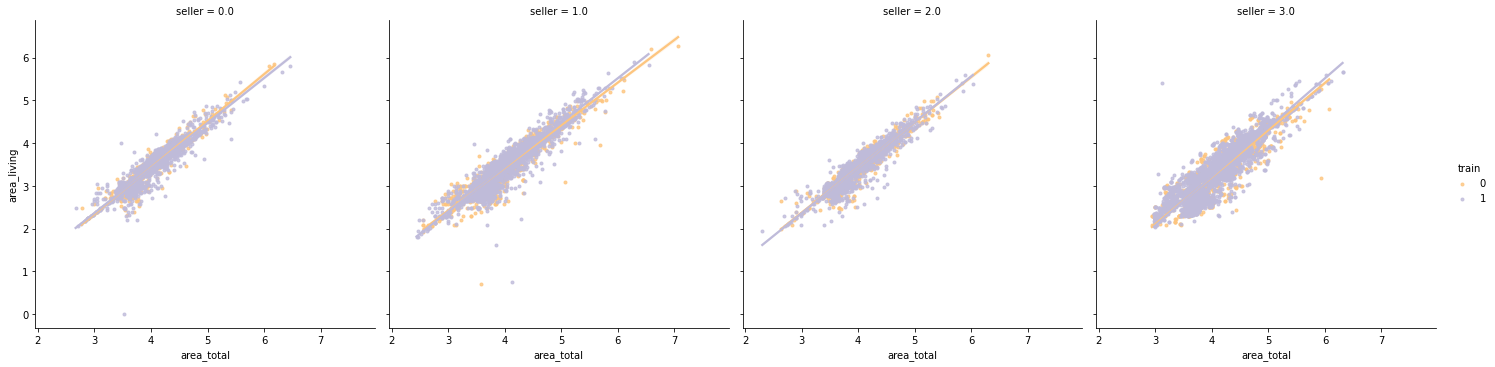

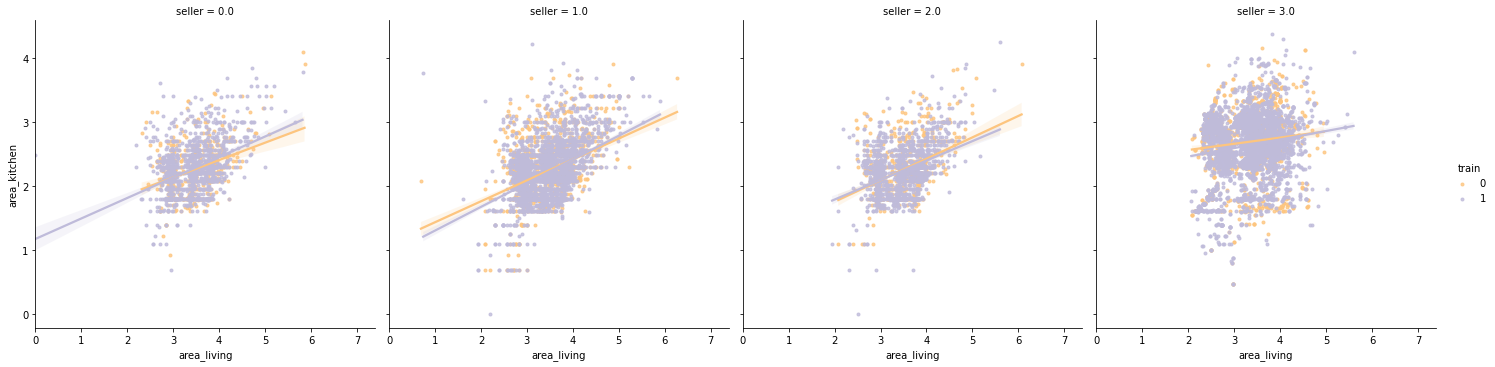

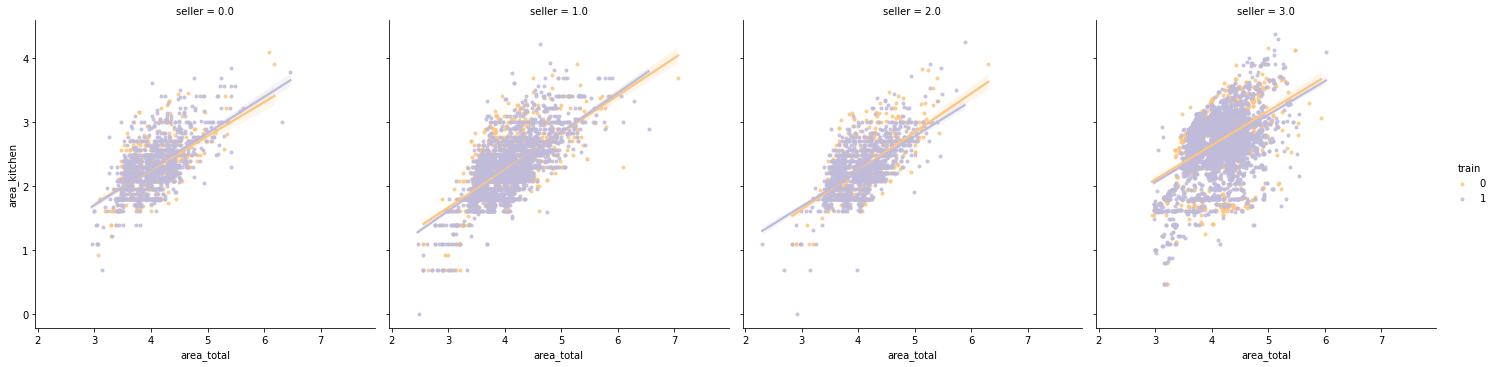

In [39]:
sns.lmplot(x='area_total', y='area_living', hue='train', data=concatenated_log, markers=[".", "."], col="seller", palette="PuOr")
sns.lmplot(x='area_living', y='area_kitchen', hue='train', data=concatenated_log, markers=[".", "."], col="seller", palette="PuOr")
sns.lmplot(x='area_total', y='area_kitchen', hue='train', data=concatenated_log, markers=[".", "."], col="seller", palette="PuOr")